In [1]:
import stata_setup
stata_setup.config(r"/Applications/Stata/", "be")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      Stata 18.0
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: 35-user network perpetual
Serial number: 301806305068
  Licensed to: Brian Locke
               University of Utah

Notes:
      1. Unicode is supported; see help unicode_advice.


Pull in dataset and retain only cases that would have been eligible for the control group: admits captured in our system

In [2]:
%%stata
clear
use "data/full_db"
drop if admissionlocation == "Outpatient" 
drop if admissionlocation == "OSH"
capture mkdir "Results and Figures"
capture mkdir "Results and Figures/$S_DATE/"


. clear

. use "data/full_db"

. drop if admissionlocation == "Outpatient" 
(9 observations deleted)

. drop if admissionlocation == "OSH"
(2 observations deleted)

. capture mkdir "Results and Figures"

. capture mkdir "Results and Figures/$S_DATE/"

. 


## Summary Tables

stratified by splenectomy status 

### Demographics (age, gender, BMI)

In [3]:
%%stata

table1_mc, by(splenectomy) ///
		vars( ///
		age conts %4.0f \ ///
		male_sex bin %4.0f \ ///
		is_white bin %4.0f \ ///
		bmi_pe conts %4.1f \ ///
		years_since_splenectomy conts %4.1f \ ///
		) ///
		percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol saving("Results and Figures/$S_DATE/demographics by splenectomy.xlsx", replace)


. 
. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 age conts %4.0f \ ///
>                 male_sex bin %4.0f \ ///
>                 is_white bin %4.0f \ ///
>                 bmi_pe conts %4.1f \ ///
>                 years_since_splenectomy conts %4.1f \ ///
>                 ) ///
>                 percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(
> ")") missing onecol saving("Results and Figures/$S_DATE/demographics by splen
> ectomy.xlsx", replace)

  +----------------------------------------------------------+
  | factor                             N_0   N_1   m_0   m_1 |
  |----------------------------------------------------------|
  | Age (years)                        100    40     0     0 |
  |----------------------------------------------------------|
  | Male Sex                           100    40     0     0 |
  |----------------------------------------------------------|
  | White Race?                        100    40     0 

### Admit characteristics (floor vs ICU, LOS)

In [4]:
%%stata
table1_mc, by(splenectomy) ///
		vars( ///
		pesi_pe conts %4.0f \ ///
		admissionlocation cat %4.0f \ ///
		hospitallosdays conts %4.0f \ ///
		iculos conts %4.0f \ ///
		) ///
		percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol saving("Results and Figures/$S_DATE/admit chars by splenectomy.xlsx", replace)	


. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 pesi_pe conts %4.0f \ ///
>                 admissionlocation cat %4.0f \ ///
>                 hospitallosdays conts %4.0f \ ///
>                 iculos conts %4.0f \ ///
>                 ) ///
>                 percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(
> ")") missing onecol saving("Results and Figures/$S_DATE/admit chars by splene
> ctomy.xlsx", replace)        

  +----------------------------------------+
  | factor           N_0   N_1   m_0   m_1 |
  |----------------------------------------|
  | PESI             100    40     0     0 |
  |----------------------------------------|
  | Admit Location   100    40     0     0 |
  |----------------------------------------|
  | Hospital LOS     100    40     0     0 |
  |----------------------------------------|
  | ICU LOS          100    40     0     0 |
  +----------------------------------------+
   N_ ... #records used below,   m_


. // pesi_pe "PESI"
. twoway kdensity pesi_pe if splenectomy == 0, recast(area) fcolor(navy%05) lco
> lor(navy) lpattern(solid) lwidth(*2.5) bwidth(10) range(0 240) || ///
> kdensity pesi_pe if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cr
> anberry) lpattern(solid)  lwidth(*2.5) bwidth(10) range(0 240) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0(40)240, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PESI", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("PESI Score by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/PESI by Splenectomy Status.png", as
> (png) name("Graph") replace 
file Results and Figures/18 Jun 2025/PESI by Splenectomy Status.png written in 
> PNG format

. 


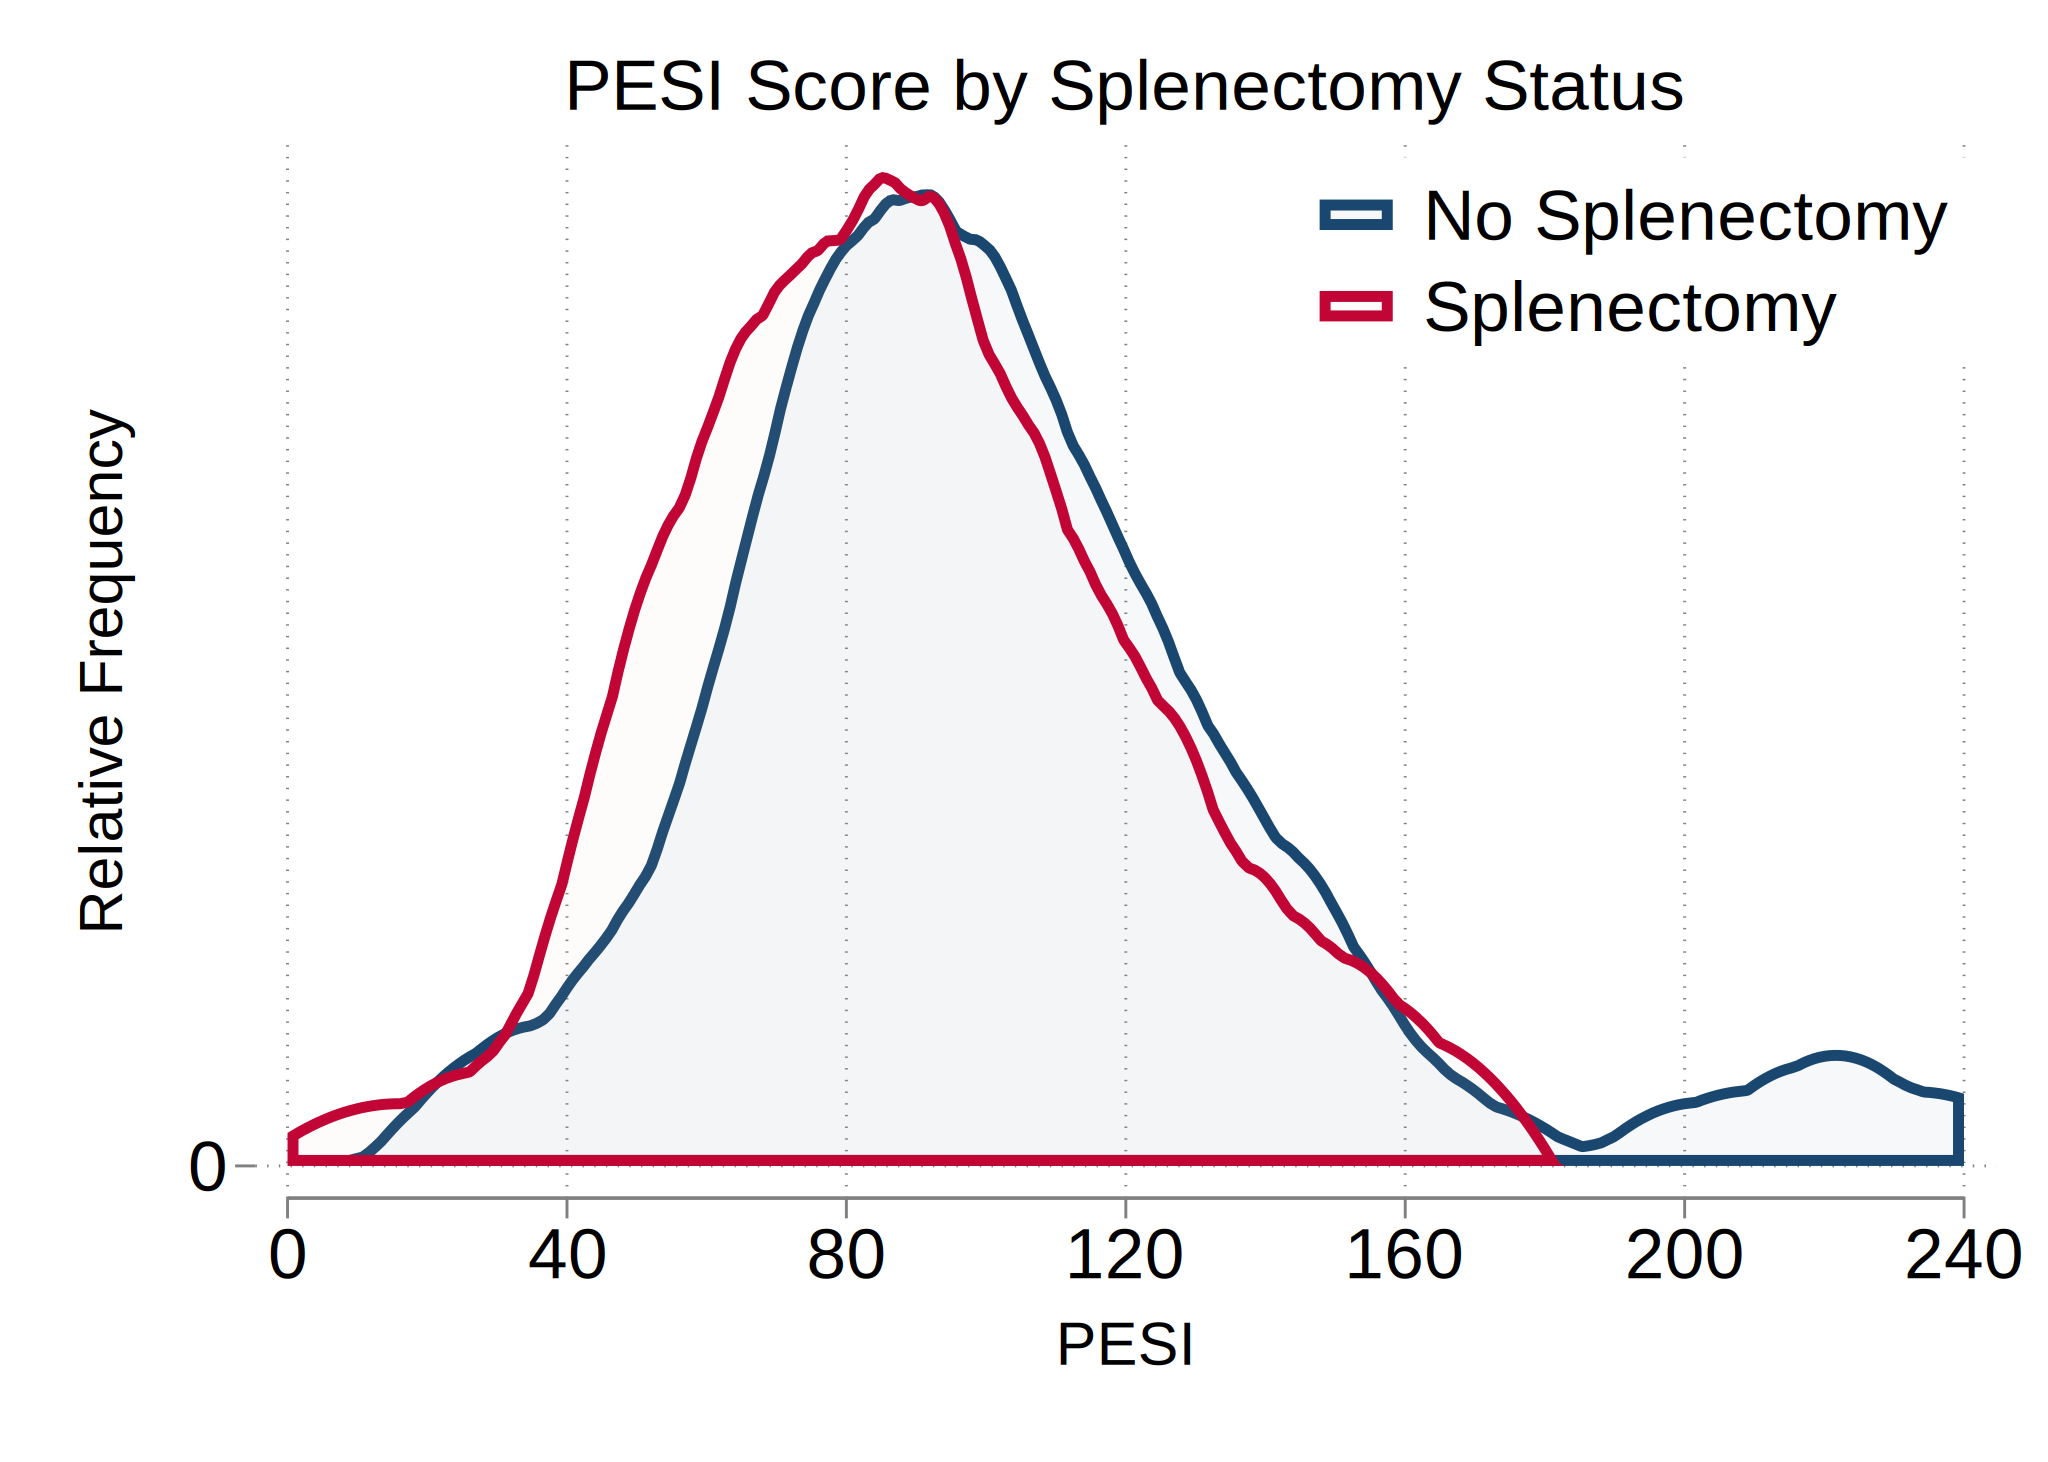

In [5]:
%%stata
// pesi_pe "PESI"
twoway kdensity pesi_pe if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(10) range(0 240) || ///
kdensity pesi_pe if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(10) range(0 240) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0(40)240, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PESI", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("PESI Score by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/PESI by Splenectomy Status.png", as(png) name("Graph") replace 


. // variable hospitallosdays     "Hospital LOS"
. twoway kdensity hospitallosdays if splenectomy == 0, recast(area) fcolor(navy
> %05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(5) range(0 60) || ///
> kdensity hospitallosdays if splenectomy == 1, recast(area) fcolor(erose%05) l
> color(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(5) range(0 60) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0(10)60, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("Hospital LOS", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("Hospital LOS by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. 


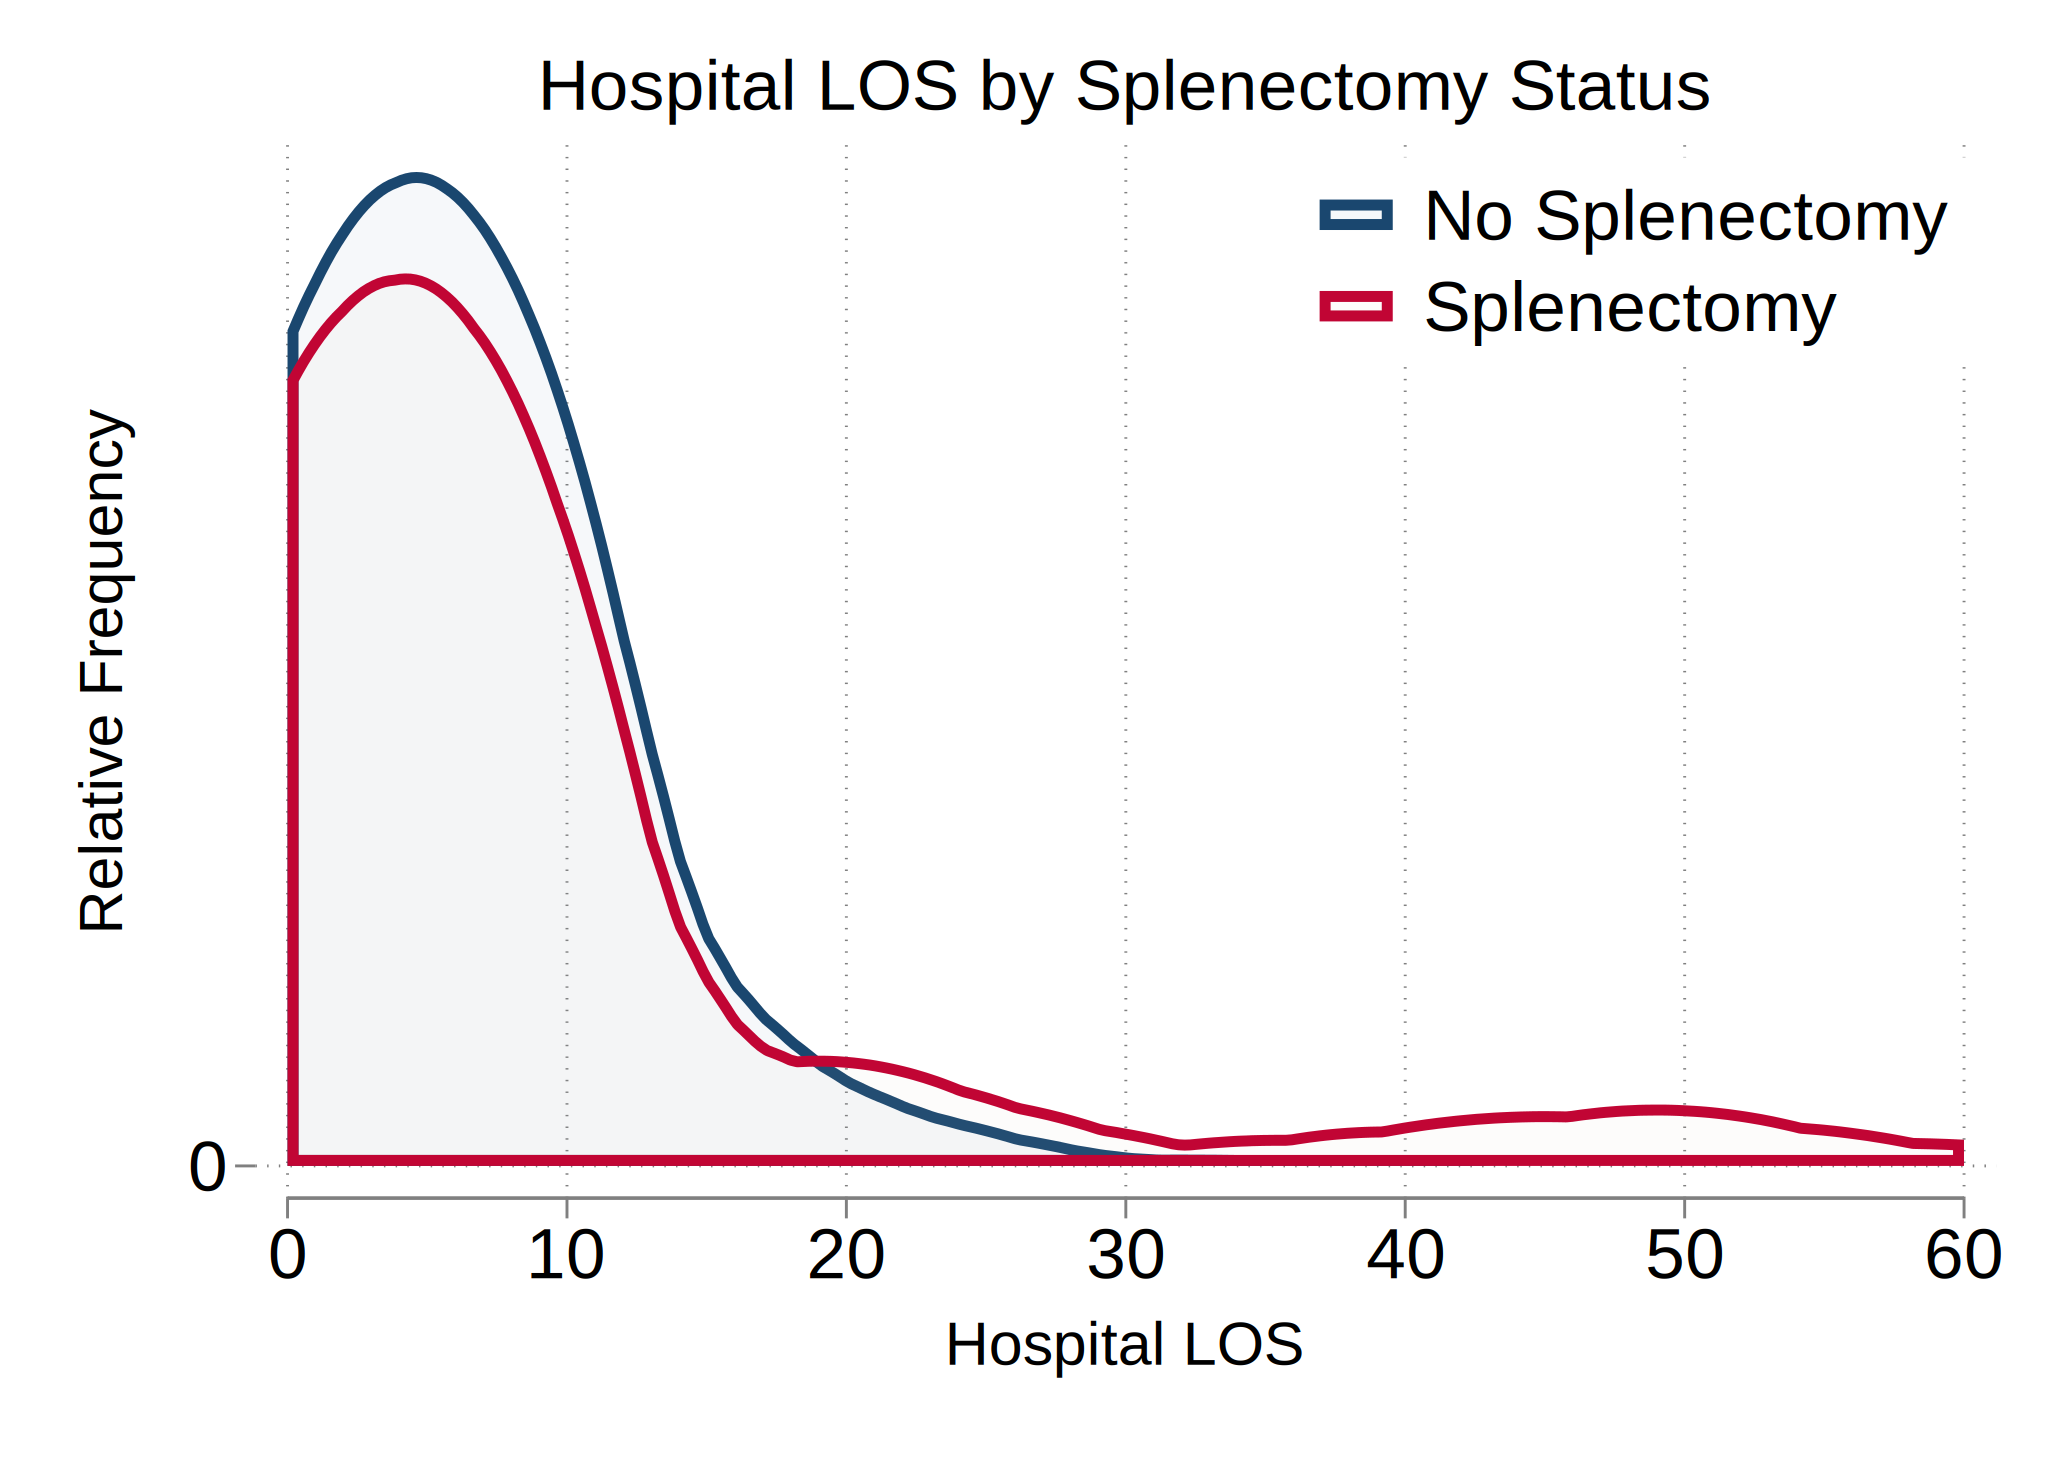

In [6]:
%%stata
// variable hospitallosdays	"Hospital LOS"
twoway kdensity hospitallosdays if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(5) range(0 60) || ///
kdensity hospitallosdays if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(5) range(0 60) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0(10)60, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("Hospital LOS", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("Hospital LOS by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)

### Evidence of RV strain (trop, BNP, RV/LV ratio) or PH (PA diameter)


In [7]:
%%stata
table1_mc, by(splenectomy) ///
		vars( ///
		pa_d conts %4.2f \ ///
		pa_aa conts %4.2f \ ///
		pa_enlarged bin %4.0f \ ///
		high_pa_aa bin %4.0f \ ///
		rvlvratio conts %4.2f \ ///
		rvlvratio_initial1abnormal bin %4.0f \ ///
		rightheartstrain bin %4.0f \ ///
		rvsp conts %4.2f \ ///
		septal_flattening bin %4.0f \ ///
		troponin_max conts %4.2f \ ///
		bnp_max conts %4.0f \ ///
		) ///
		percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol saving("Results and Figures/$S_DATE/rv strain by splenectomy.xlsx", replace)


. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 pa_d conts %4.2f \ ///
>                 pa_aa conts %4.2f \ ///
>                 pa_enlarged bin %4.0f \ ///
>                 high_pa_aa bin %4.0f \ ///
>                 rvlvratio conts %4.2f \ ///
>                 rvlvratio_initial1abnormal bin %4.0f \ ///
>                 rightheartstrain bin %4.0f \ ///
>                 rvsp conts %4.2f \ ///
>                 septal_flattening bin %4.0f \ ///
>                 troponin_max conts %4.2f \ ///
>                 bnp_max conts %4.0f \ ///
>                 ) ///
>                 percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(
> ")") missing onecol saving("Results and Figures/$S_DATE/rv strain by splenect
> omy.xlsx", replace)

  +----------------------------------------------------------------------------
> +
  | factor                                               N_0   N_1   m_0   m_1 
> |
  |------------------------------------------


. // PA diameter
. twoway kdensity pa_d if splenectomy == 0, recast(area) fcolor(navy%05) lcolor
> (navy) lpattern(solid) lwidth(*2.5) bwidth(2.5) range(10 45) || ///
> kdensity pa_d if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranb
> erry) lpattern(solid)  lwidth(*2.5) bwidth(2.5) range(10 45) ||, ///
> legend(pos(10) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size
> (medlarge)) ///
> xlabel(10(5)45, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PA Diameter (mm)", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("PA Diameter by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/PA Diameter by Splenectomy Status.p
> ng", as(png) name("Graph") replace
file Results and Figures/18 Jun 2025/PA Diameter by Splenectomy Status.png writ
> ten in PNG format

. 


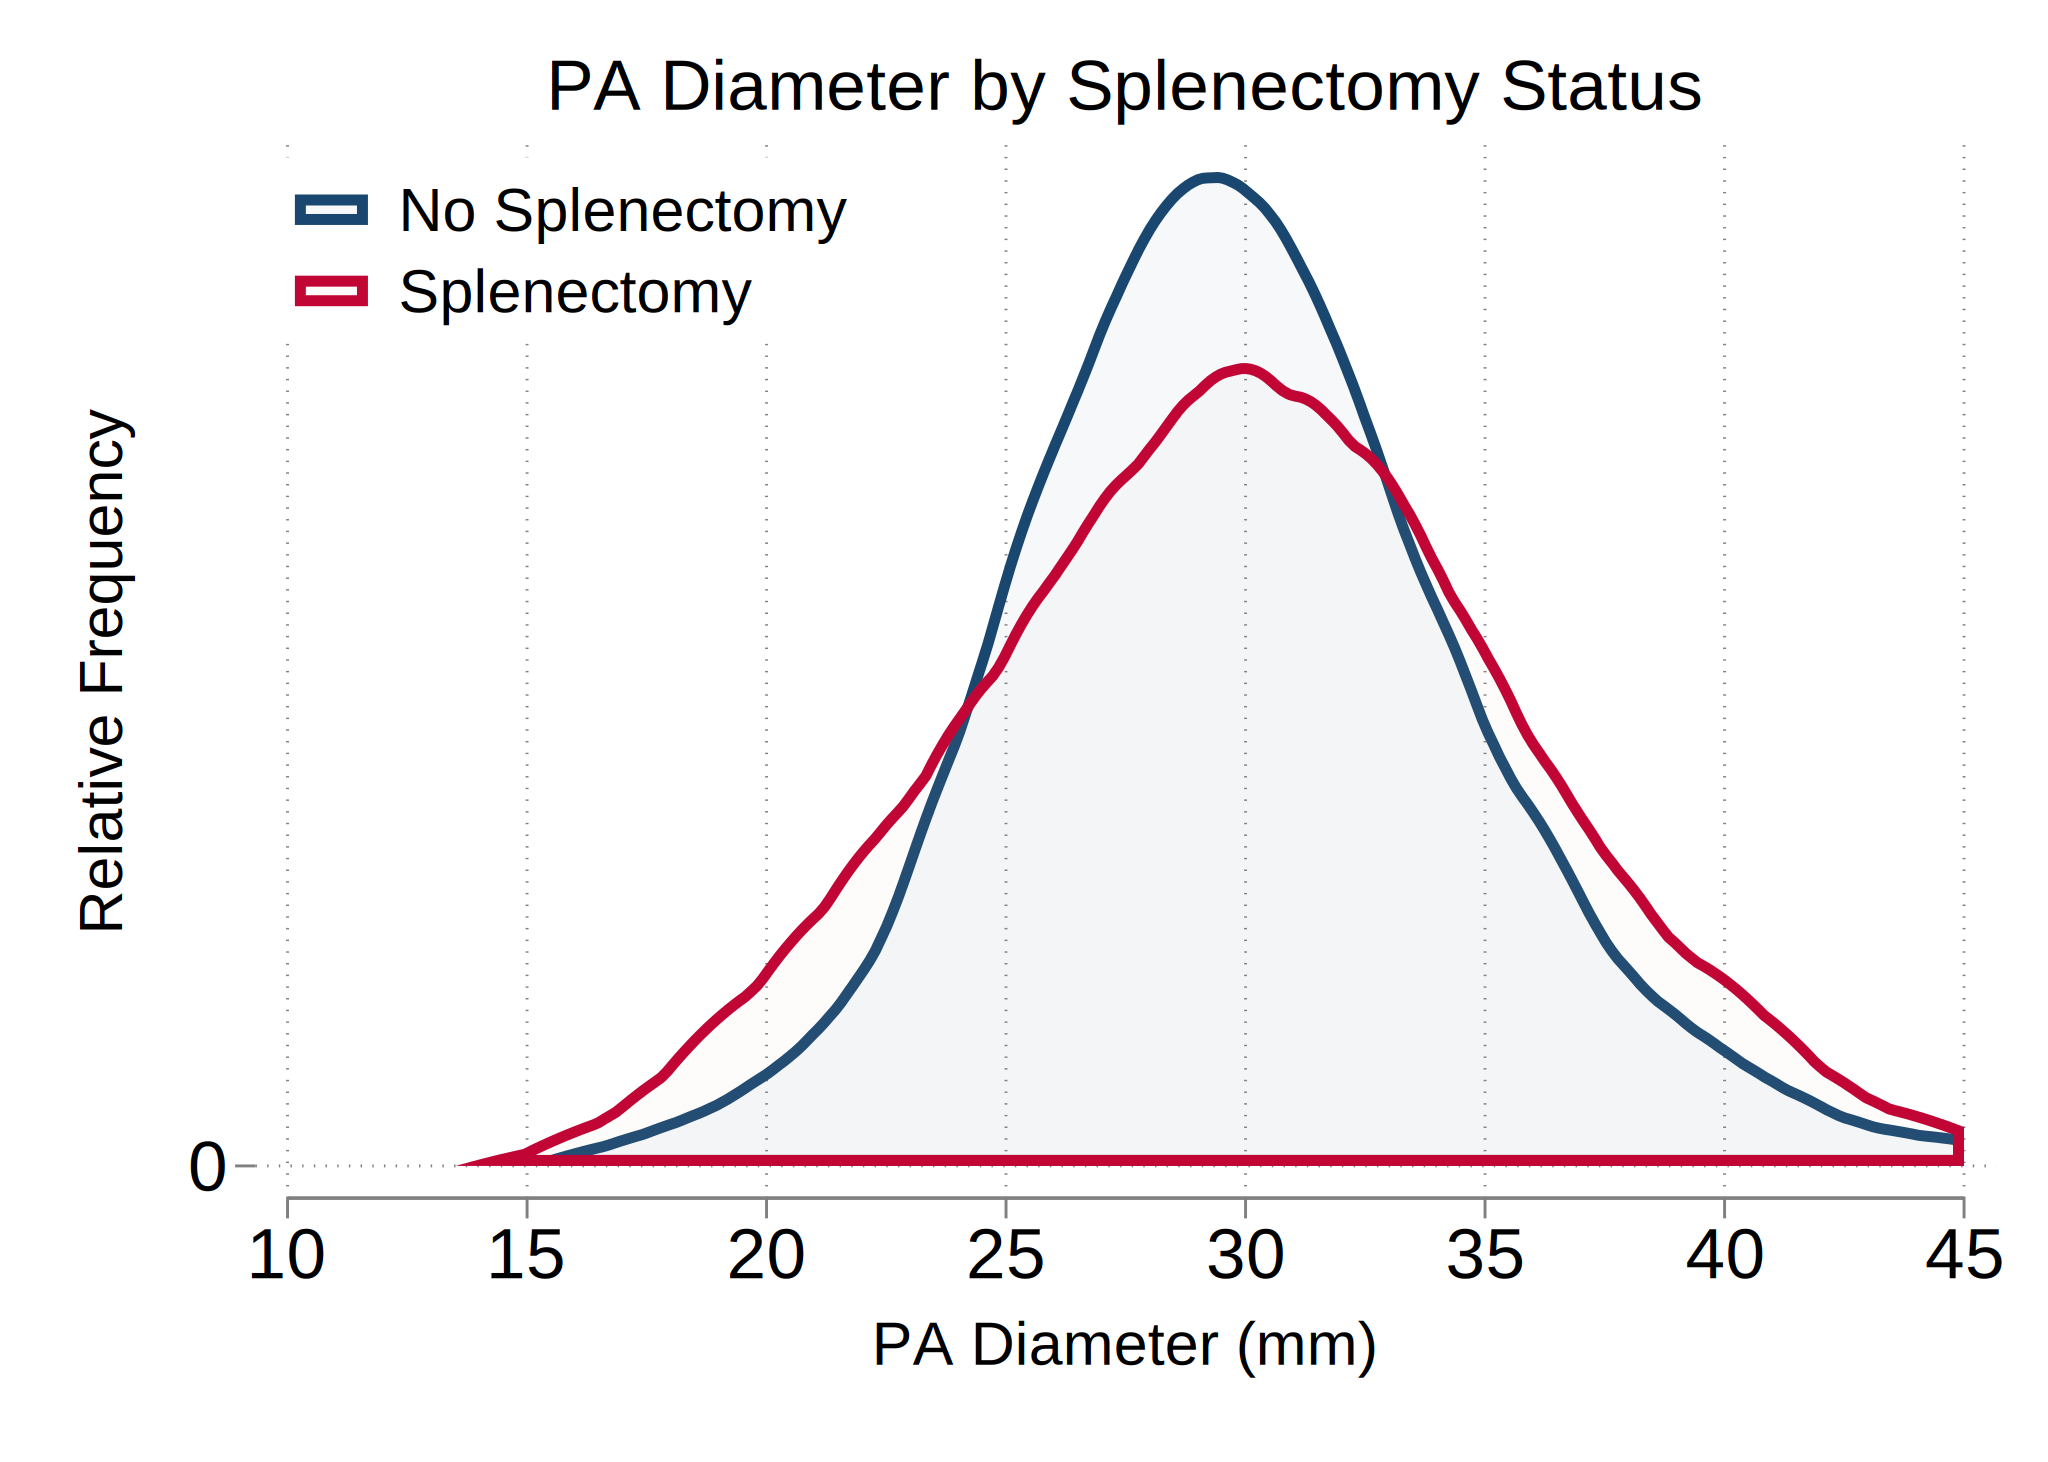

In [8]:
%%stata
// PA diameter
twoway kdensity pa_d if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(2.5) range(10 45) || ///
kdensity pa_d if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(2.5) range(10 45) ||, ///
legend(pos(10) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(medlarge)) ///
xlabel(10(5)45, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PA Diameter (mm)", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("PA Diameter by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/PA Diameter by Splenectomy Status.png", as(png) name("Graph") replace


. //PA:AA
. twoway kdensity pa_aa if splenectomy == 0, recast(area) fcolor(navy%05) lcolo
> r(navy) lpattern(solid) lwidth(*2.5) bwidth(.05) range(0.5 1.5) || ///
> kdensity pa_aa if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cran
> berry) lpattern(solid)  lwidth(*2.5) bwidth(.05) range(0.5 1.5) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0.5(.1)1.5, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PA:AA Ratio", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("Pulm Artery to Ascending Aorta ratio, by Splenectomy Status", size(lar
> ge)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/PA to AA by Splenectomy Status.png"
> , as(png) name("Graph") replace
file Results and Figures/18 Jun 2025/PA to AA by Splenectomy Status.png written
>  in PNG format

. 


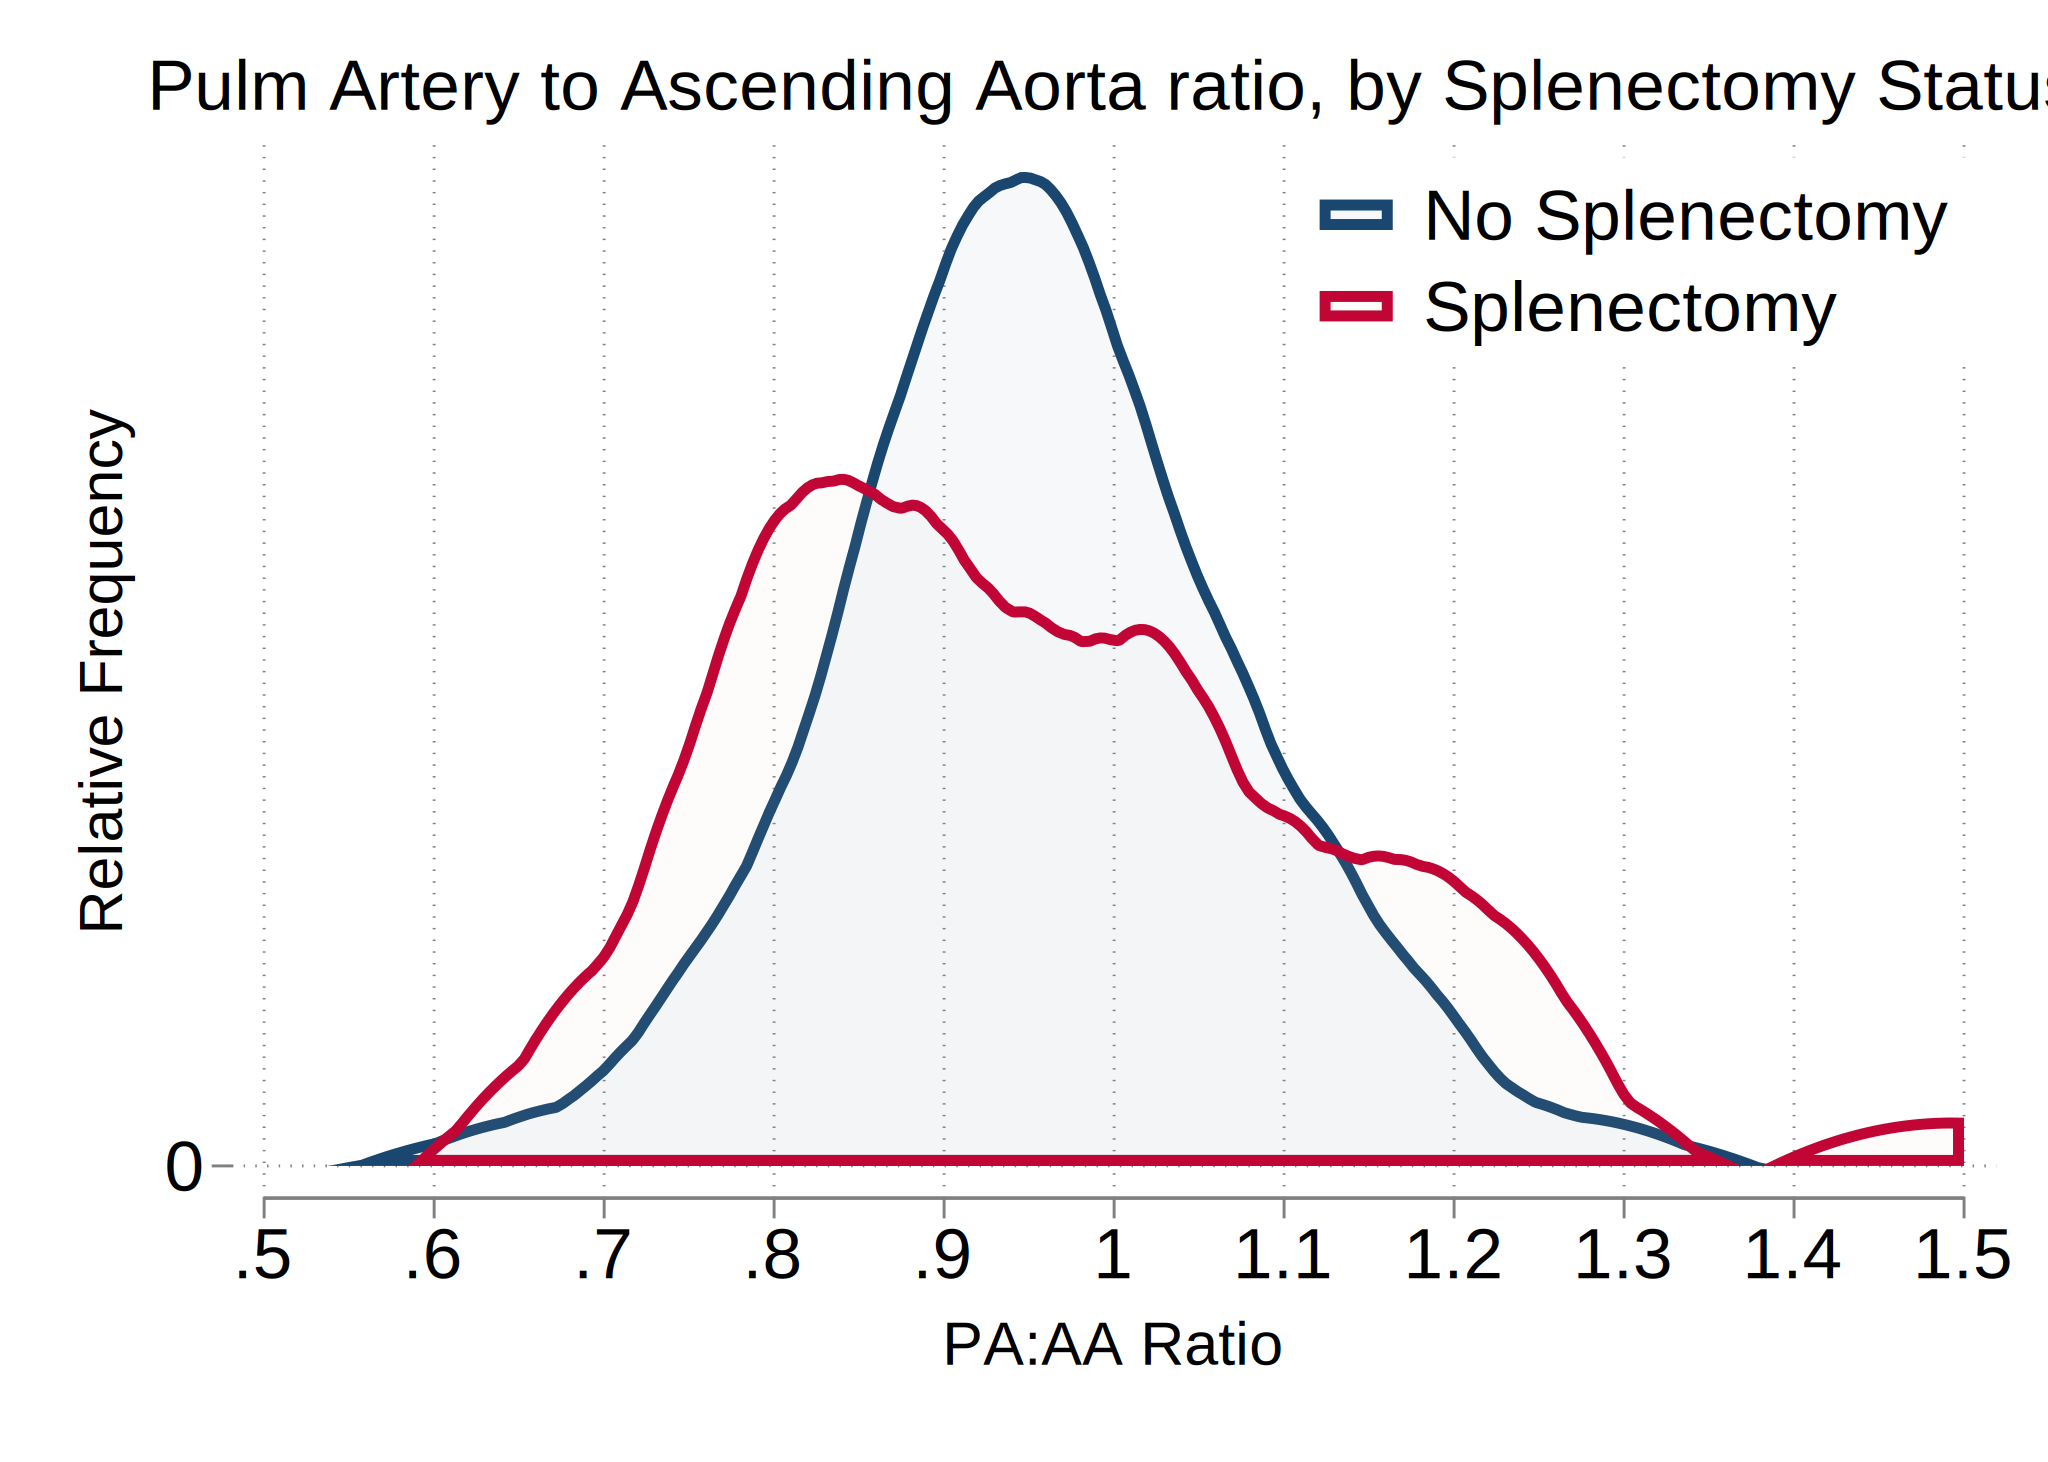

In [9]:
%%stata
//PA:AA
twoway kdensity pa_aa if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(.05) range(0.5 1.5) || ///
kdensity pa_aa if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(.05) range(0.5 1.5) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0.5(.1)1.5, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PA:AA Ratio", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("Pulm Artery to Ascending Aorta ratio, by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/PA to AA by Splenectomy Status.png", as(png) name("Graph") replace

Note, really high rate of enlarged PA

RV:LV


. // RV LV ratio (new)
. twoway kdensity rvlvratio if splenectomy == 0, recast(area) fcolor(navy%05) l
> color(navy) lpattern(solid) lwidth(*2.5) bwidth(0.25) range(0.45 2.55) || ///
> kdensity rvlvratio if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(
> cranberry) lpattern(solid)  lwidth(*2.5) bwidth(0.25) range(0.45 2.55) ||, //
> /
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> medlarge)) ///
> xlabel(0.45(.2)2.55, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("RV to LV ratio", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("RV:LV Ratio by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. 


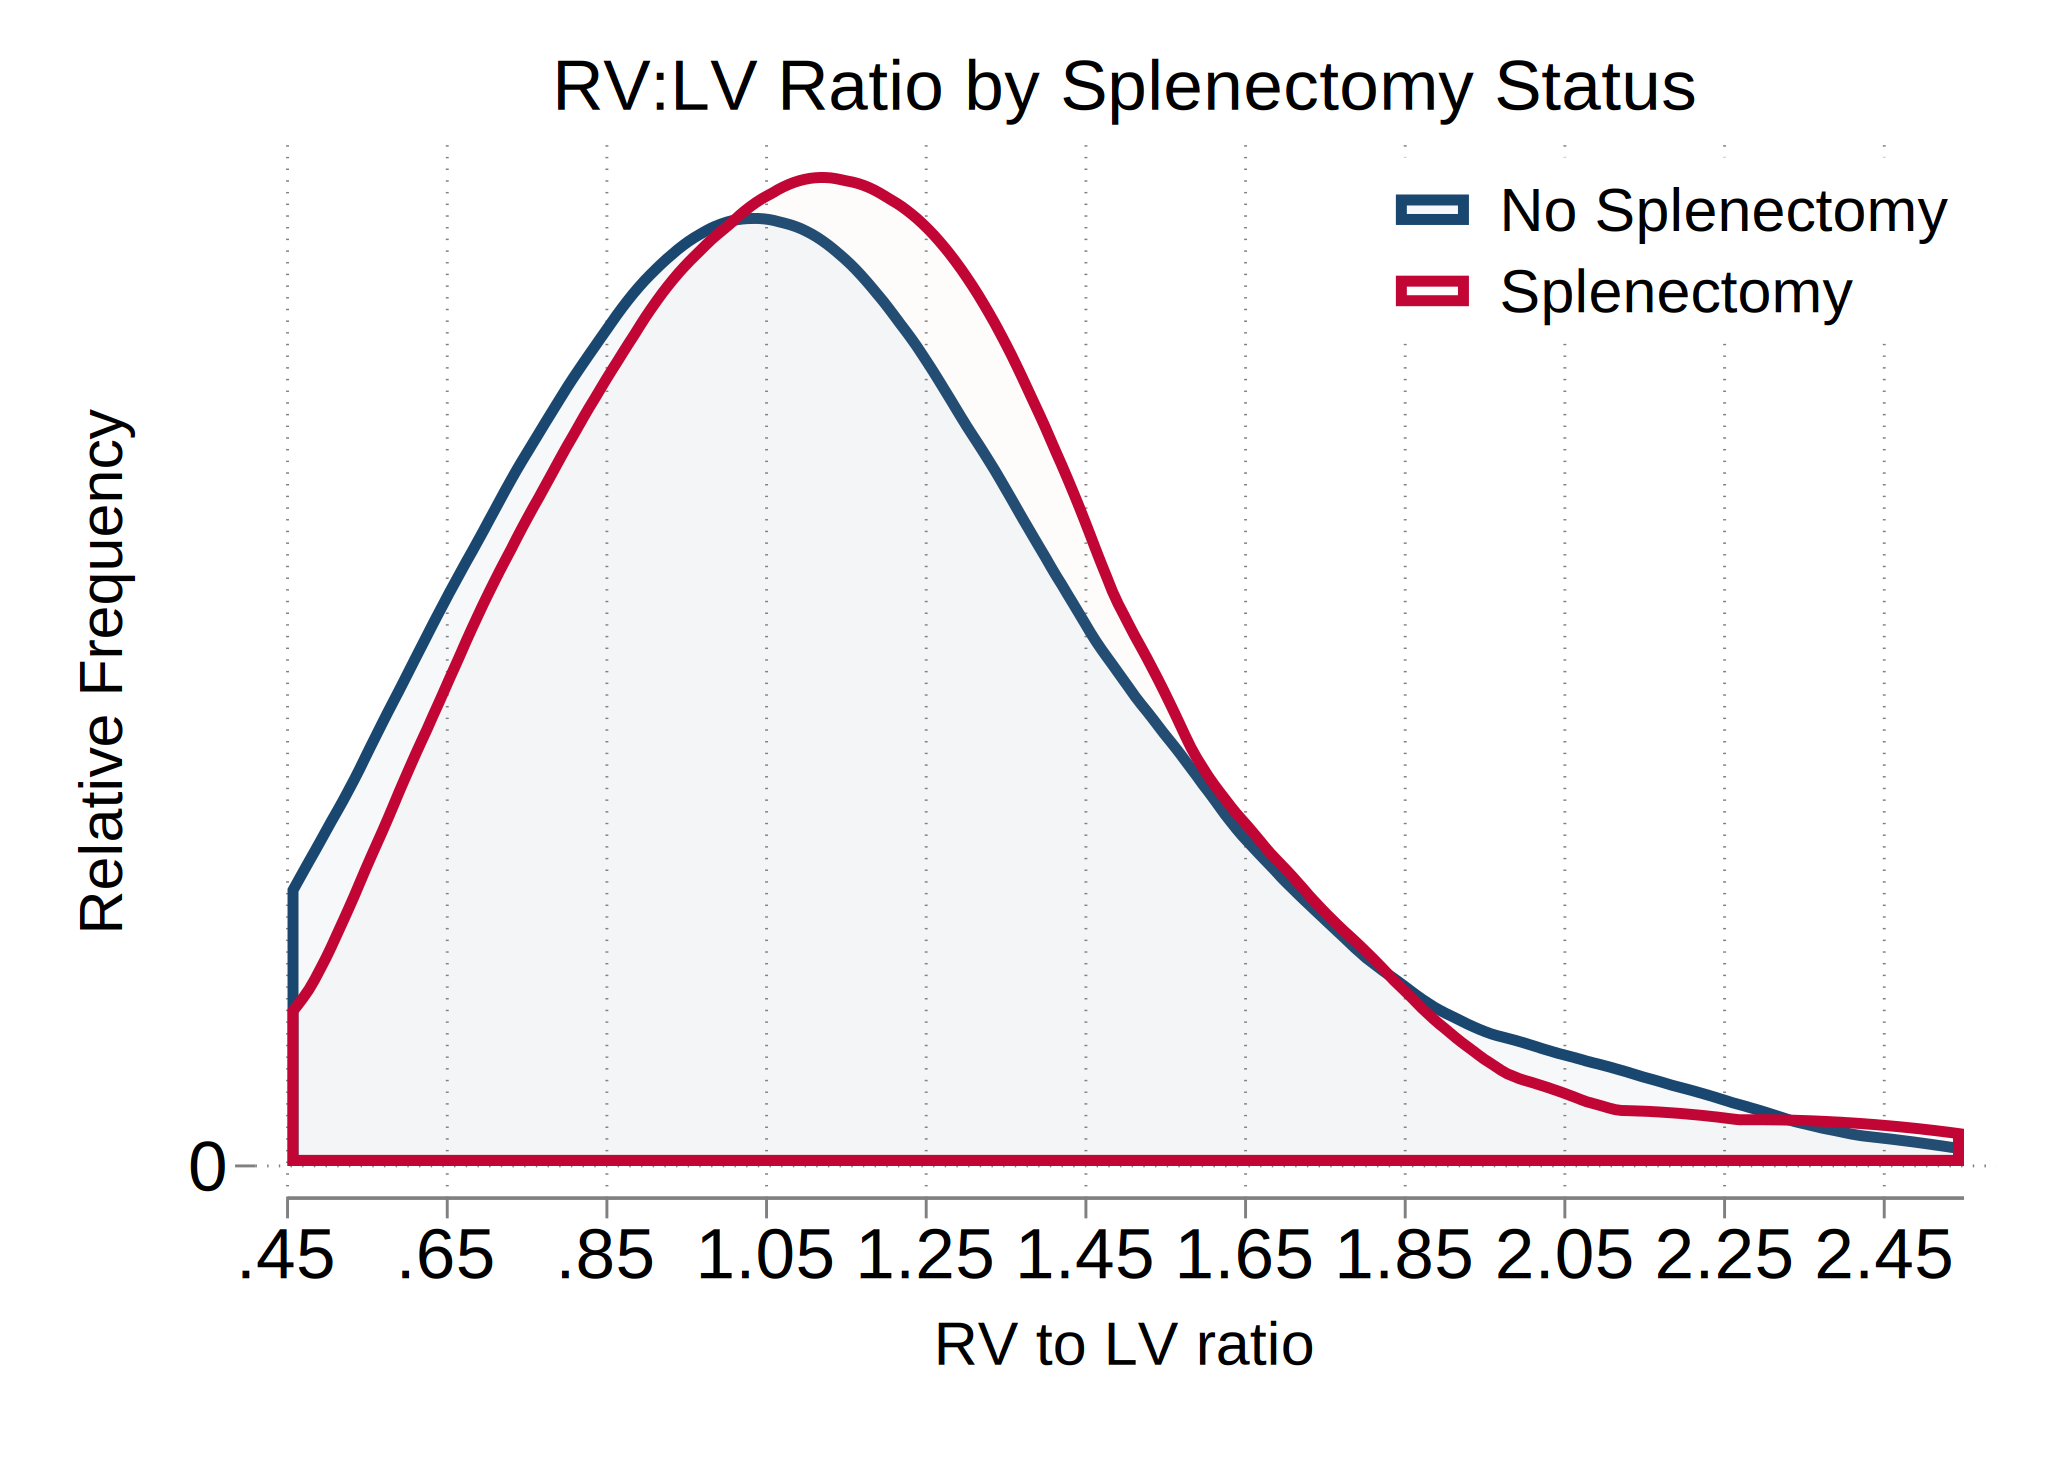

In [10]:
%%stata
// RV LV ratio (new)
twoway kdensity rvlvratio if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(0.25) range(0.45 2.55) || ///
kdensity rvlvratio if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(0.25) range(0.45 2.55) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(medlarge)) ///
xlabel(0.45(.2)2.55, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("RV to LV ratio", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("RV:LV Ratio by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)


### Clot characteristics (central vs. peripheral, Qanadli score)

In [11]:
%%stata
table1_mc, by(splenectomy) ///
		vars( ///
		peripheral bin %4.0f \ ///
		qanadli conts %4.2f \ ///
		) ///
		percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol saving("Results and Figures/$S_DATE/clot chars by splenectomy.xlsx", replace)	


. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 peripheral bin %4.0f \ ///
>                 qanadli conts %4.2f \ ///
>                 ) ///
>                 percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(
> ")") missing onecol saving("Results and Figures/$S_DATE/clot chars by splenec
> tomy.xlsx", replace) 

  +---------------------------------------------+
  | factor                N_0   N_1   m_0   m_1 |
  |---------------------------------------------|
  | Peripheral PE         100    40     0     0 |
  |---------------------------------------------|
  | Qanadli Score (Avg)   100    40     0     0 |
  +---------------------------------------------+
   N_ ... #records used below,   m_ ... #records not used
 
  +---------------------------------------------------------------------+
  |                       No Splenectomy     Splenectomy        p-value |
  |---------------------------------------------------------------------|
  |     


. //Association between splenectomy and quanadli score
. twoway kdensity qanadli if splenectomy == 0, recast(area) fcolor(navy%05) lco
> lor(navy) lpattern(solid) lwidth(*2.5) bwidth(0.1) range(0 1) || ///
> kdensity qanadli if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cr
> anberry) lpattern(solid)  lwidth(*2.5) bwidth(0.1) range(0 1) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0(0.1)1, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("Qanadli Score", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("Qanadli Score by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. 


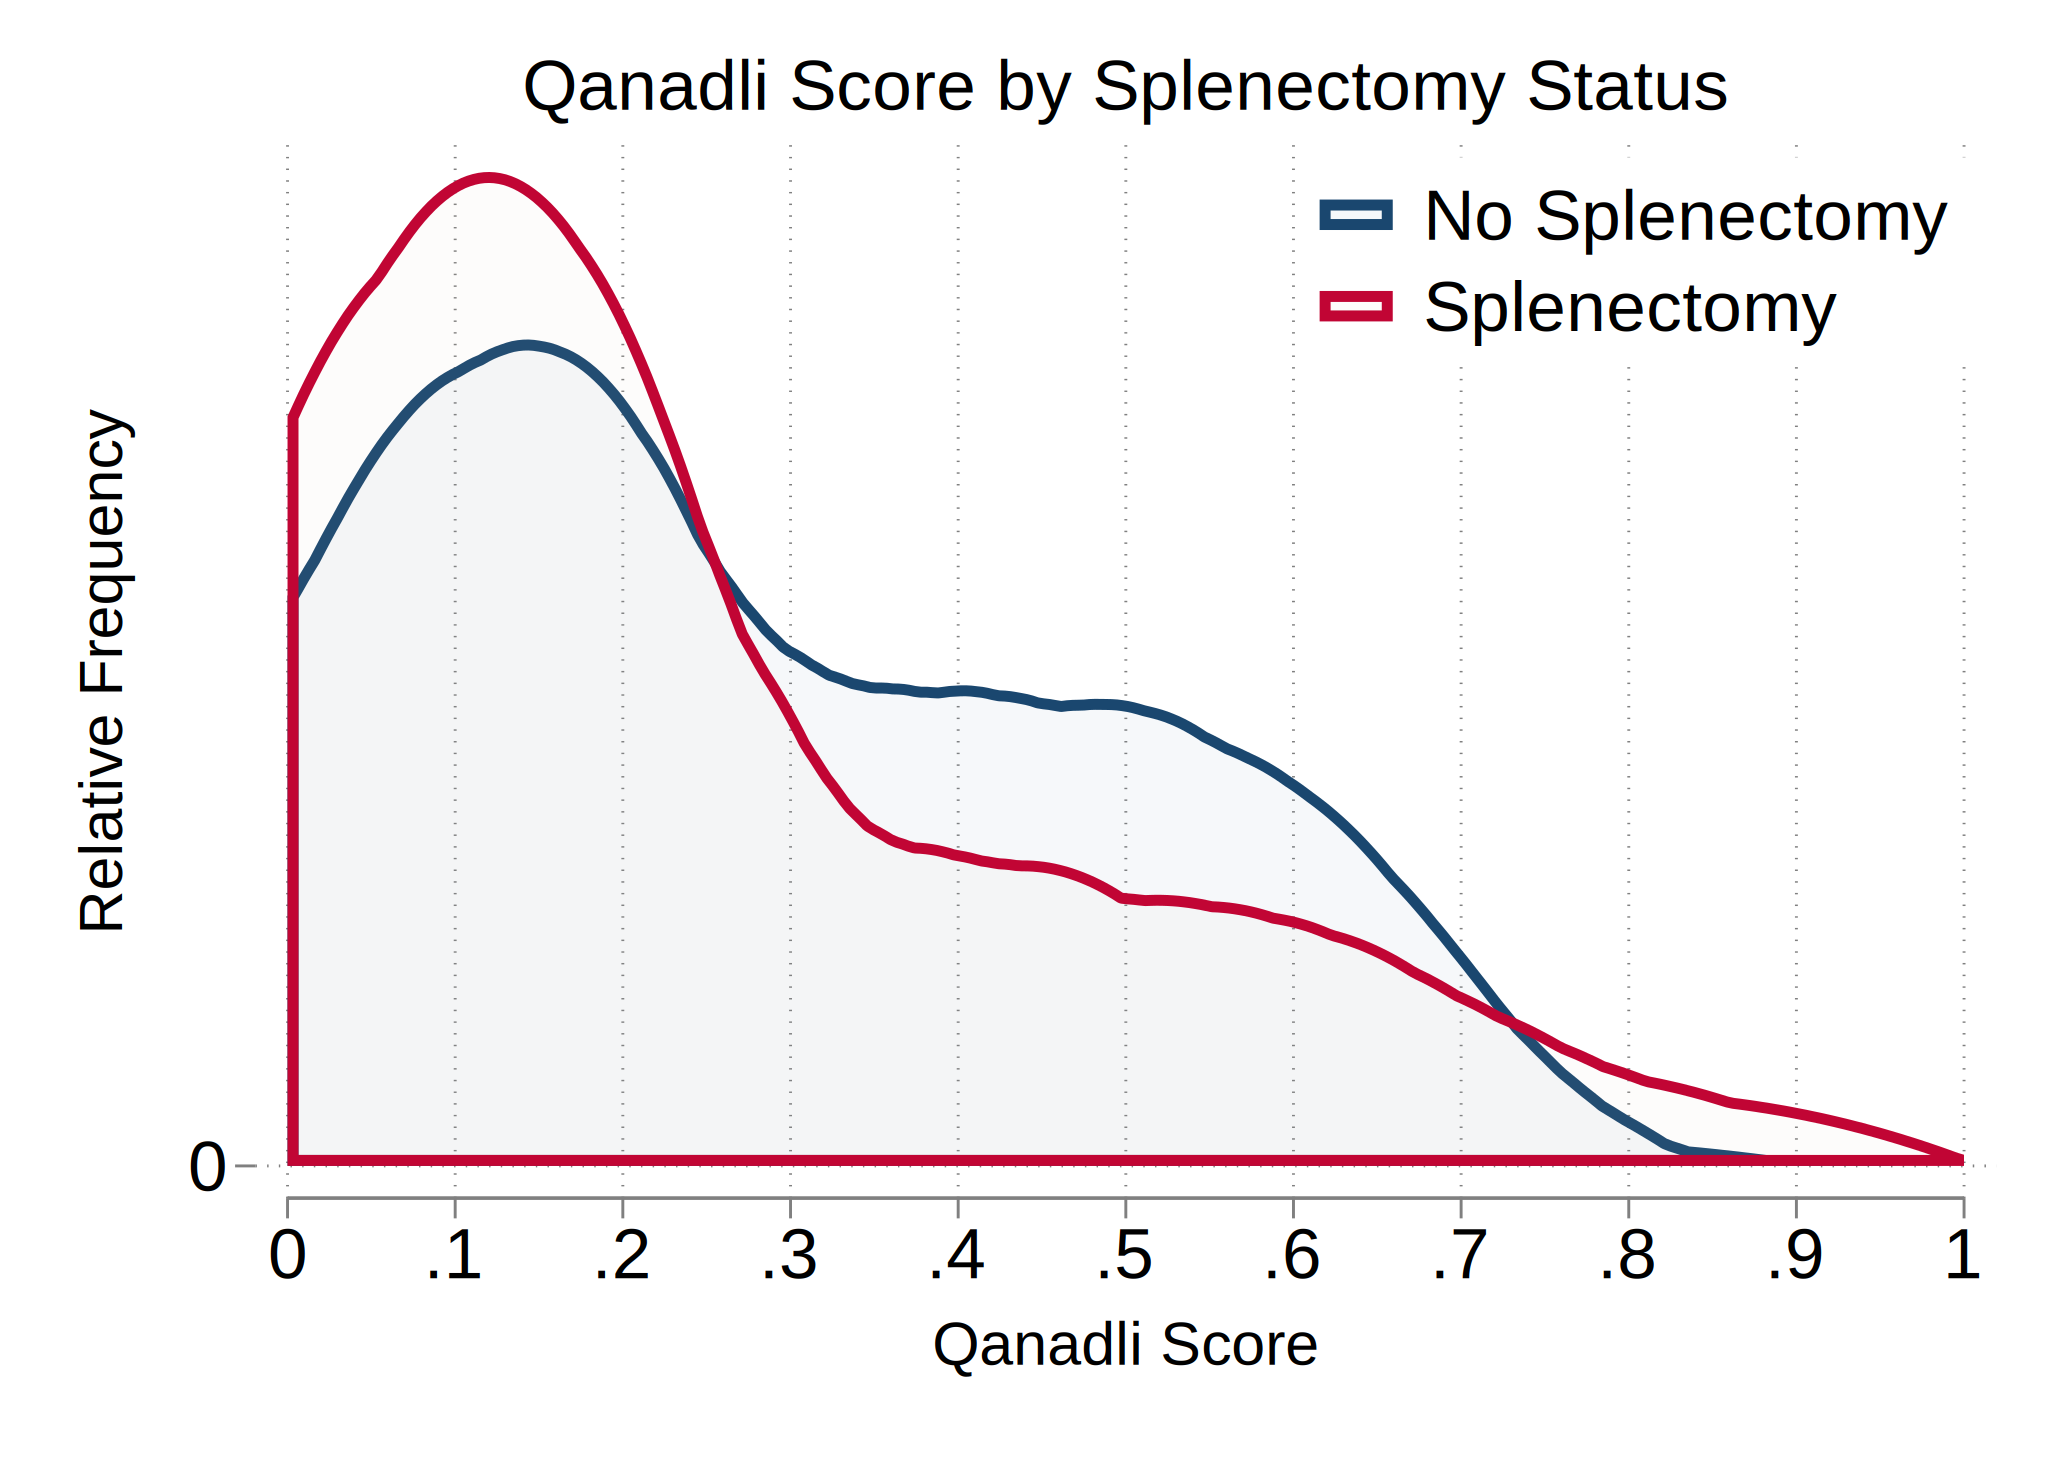

In [12]:
%%stata
//Association between splenectomy and quanadli score
twoway kdensity qanadli if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(0.1) range(0 1) || ///
kdensity qanadli if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(0.1) range(0 1) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0(0.1)1, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("Qanadli Score", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("Qanadli Score by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)

### Duration of symptoms
### Presence/absence of DVT

In [13]:
%%stata
clonevar dvt_found_imp = dvt_found          // keep original for audit
replace  dvt_found_imp = 0  if missing(dvt_found_imp) & dvt_workup == 0 

table1_mc, by(splenectomy) ///
		vars( ///
		symptoms_two_weeks bin %4.0f \ ///
		dvt_workup bin %4.0f \ ///
		dvt_found bin %4.0f \ ///
		dvt_found_imp      bin %4.0f   ///
		) ///
		percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol saving("Results and Figures/$S_DATE/dvt presence by splenectomy.xlsx", replace)


. clonevar dvt_found_imp = dvt_found          // keep original for audit
(49 missing values generated)

. replace  dvt_found_imp = 0  if missing(dvt_found_imp) & dvt_workup == 0 
(49 real changes made)

. 
. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 symptoms_two_weeks bin %4.0f \ ///
>                 dvt_workup bin %4.0f \ ///
>                 dvt_found bin %4.0f \ ///
>                 dvt_found_imp      bin %4.0f   ///
>                 ) ///
>                 percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(
> ")") missing onecol saving("Results and Figures/$S_DATE/dvt presence by splen
> ectomy.xlsx", replace)

  +---------------------------------------------------------------+
  | factor                                  N_0   N_1   m_0   m_1 |
  |---------------------------------------------------------------|
  | Symptoms present for 2 or more weeks?   100    40     0     0 |
  |----------------------------------------------------

## Main Analyses

Here are the main associations between splenectomy status and Central vs Peripheral and Qanadli score. 

In [14]:
%%stata
cs peripheral splenectomy 


                 |      Splenectomy       |
                 |   Exposed   Unexposed  |      Total
-----------------+------------------------+-----------
           Cases |        21          37  |         58
        Noncases |        19          63  |         82
-----------------+------------------------+-----------
           Total |        40         100  |        140
                 |                        |
            Risk |      .525         .37  |   .4142857
                 |                        |
                 |      Point estimate    |    [95% conf. interval]
                 |------------------------+------------------------
 Risk difference |             .155       |   -.0263933    .3363933 
      Risk ratio |         1.418919       |    .9604441     2.09625 
 Attr. frac. ex. |         .2952381       |    -.041185    .5229576 
 Attr. frac. pop |         .1068966       |
                 +-------------------------------------------------
                           

I used a Poisson regression because Qanadli score is actually a proportion (of occluded segments). 

Thus, the interpretation is: patients with splenectomy have 0.84x [0.42-1.68] of non-splenectomy

In [15]:
%%stata
poisson qanadli splenectomy age male_sex bmi_pe, irr
estimates store qanadli


. poisson qanadli splenectomy age male_sex bmi_pe, irr
note: noncount dependent variable encountered; if you are fitting an
      exponential-mean model, consider using robust standard errors.

Iteration 0:  Log likelihood = -63.672124  
Iteration 1:  Log likelihood = -63.672123  

Poisson regression                                      Number of obs =    120
                                                        LR chi2(4)    =   0.54
                                                        Prob > chi2   = 0.9698
Log likelihood = -63.672123                             Pseudo R2     = 0.0042

------------------------------------------------------------------------------
     qanadli |        IRR   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |   .7854346   .4211013    -0.45   0.652     .2746304    2.246319
         age |   1.003166   .0122126     0.26   0.795     .9795135     1.02739
    


. coefplot qanadli, eform ///
> drop(_cons) ///
> xscale(log range(0.25 4) extend) ///
> xline(1) ///
> xlabel(0.25 0.5 1 2 4, labsize(large)) ///
> xscale(extend) ///
> xtitle("Multiplicative Change in Qanadli Score" , size(large)) yscale(extend)
>  ///
> ylabel(, labsize(large)) ///
> ciopts(recast(rcap) ///
> lwidth(thick)) ///
> mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,
> "%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.
> 05, "*", "")))) ///
> mlabsize(medsmall) ///
> mlabposition(12) ///
> mlabgap(*1) ///
> scheme(white_tableau) 

. 


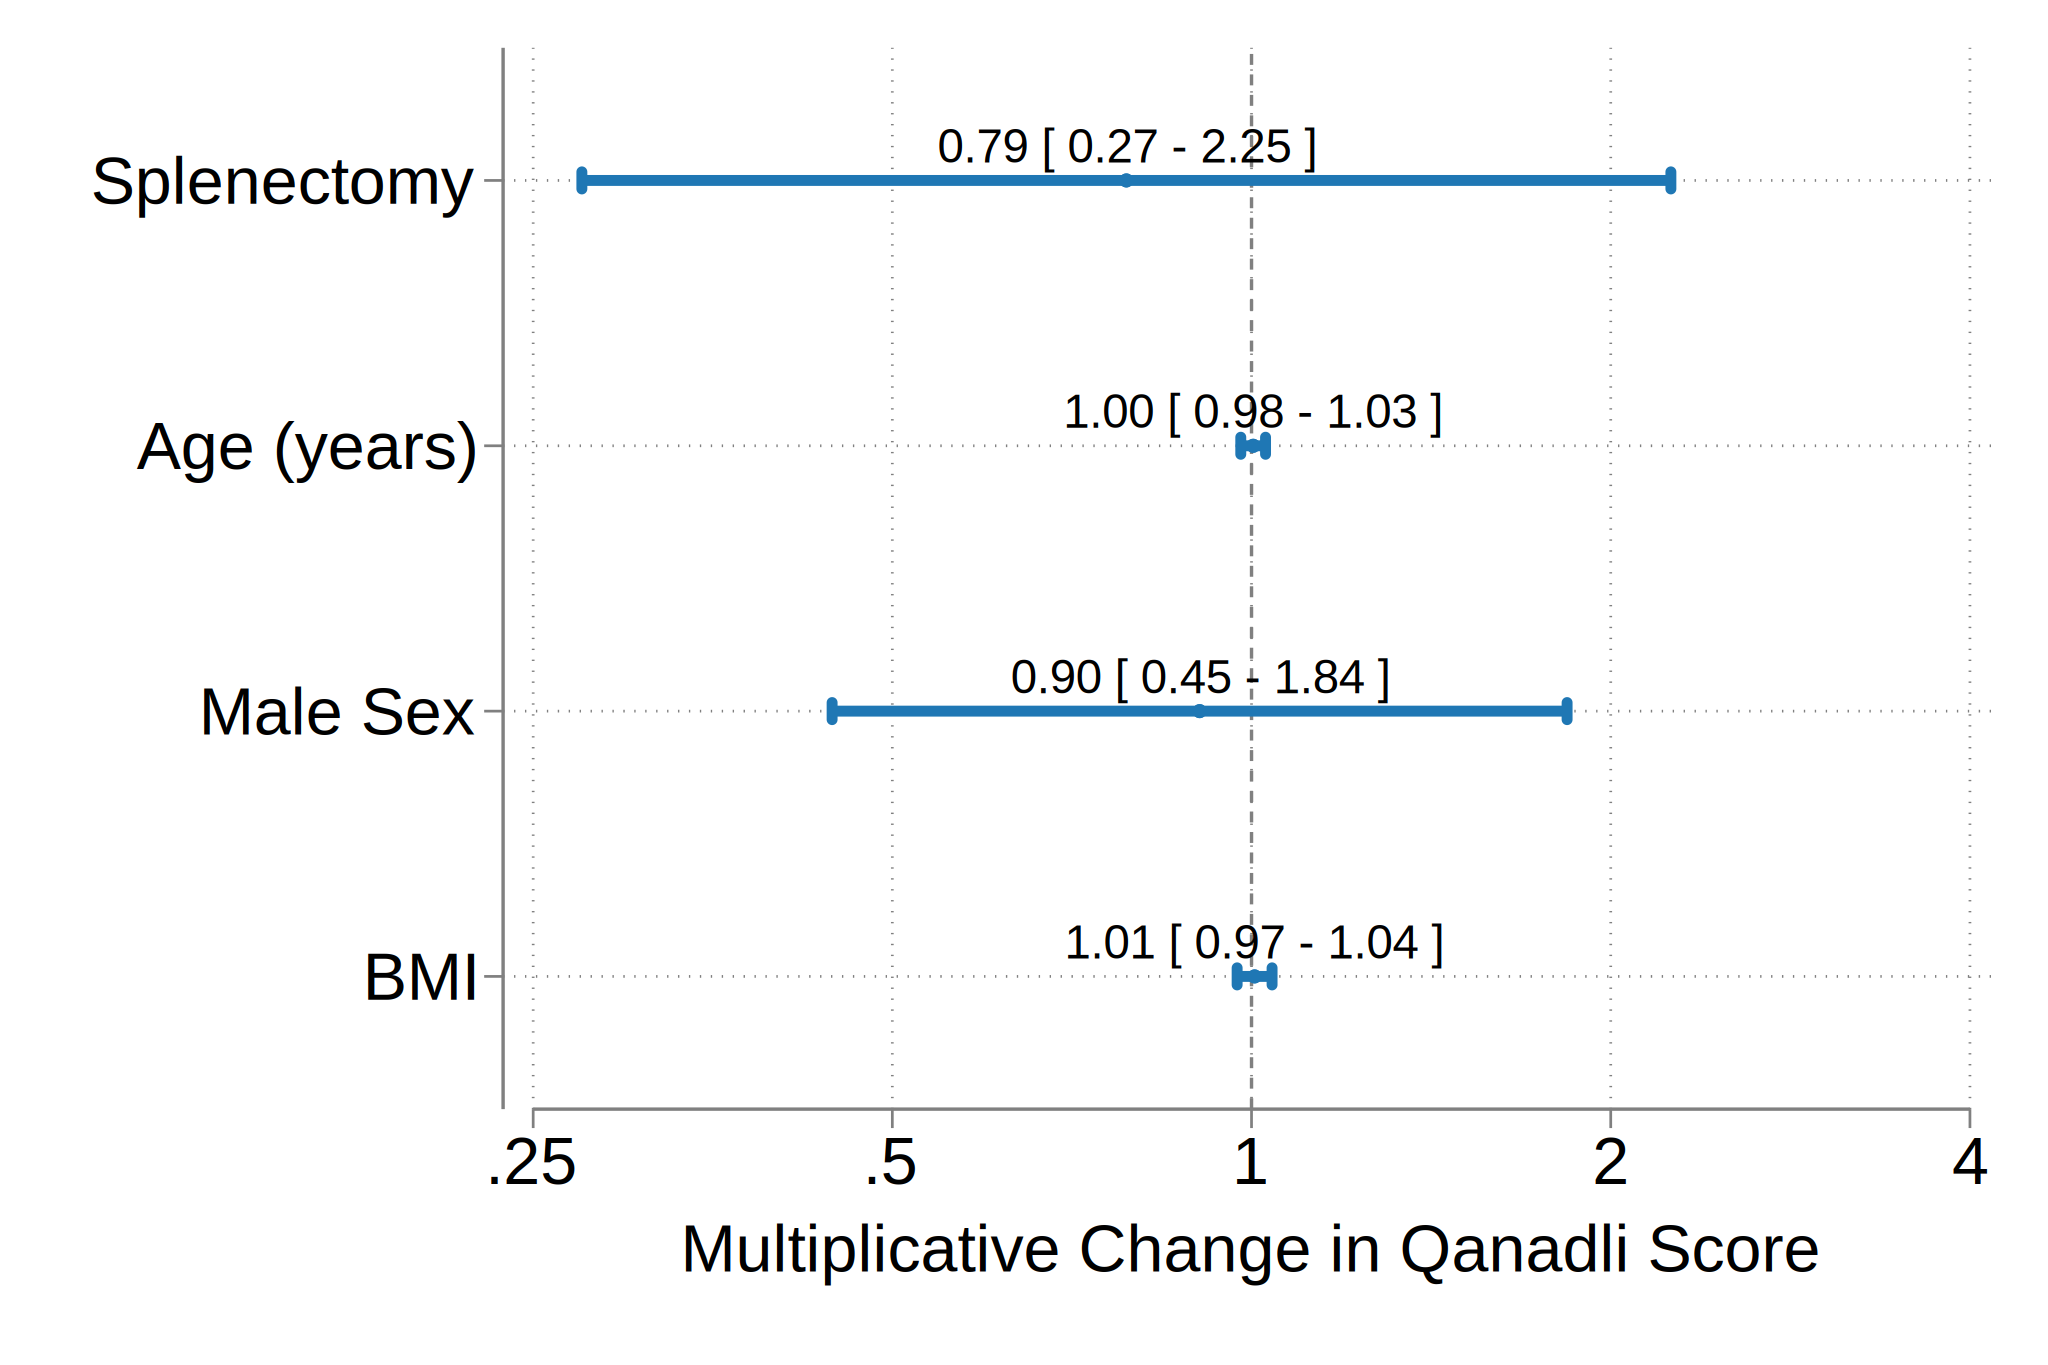

In [16]:
%%stata
coefplot qanadli, eform ///
drop(_cons) ///
xscale(log range(0.25 4) extend) ///
xline(1) ///
xlabel(0.25 0.5 1 2 4, labsize(large)) ///
xscale(extend) ///
xtitle("Multiplicative Change in Qanadli Score" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,"%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 

For the Peripheral vs Central classification, we can present this as an Odds Ratio or a Relative Risk - either way works

those with splenectomy are 15.5% [-0.26 to -33.7%] more likely to have peripheral PE

no longer significant, directionally similar.

Same results, presented slightly differently below

In [17]:
%%stata
generate double age_decade = age/10 if !missing(age)
label variable age_decade "Age (per decade)"
label variable bmi "BMI (per kg/m{superscript:2})"
label variable male_sex "Male"

logistic peripheral splenectomy age_decade male_sex bmi_pe

estimates store peripheral



. generate double age_decade = age/10 if !missing(age)

. label variable age_decade "Age (per decade)"

. label variable bmi "BMI (per kg/m{superscript:2})"

. label variable male_sex "Male"

. 
. logistic peripheral splenectomy age_decade male_sex bmi_pe

Logistic regression                                     Number of obs =    120
                                                        LR chi2(4)    =   7.76
                                                        Prob > chi2   = 0.1008
Log likelihood = -77.623935                             Pseudo R2     = 0.0476

------------------------------------------------------------------------------
  peripheral | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |   3.048503   1.614304     2.10   0.035     1.079795    8.606606
  age_decade |   1.044467   .1360248     0.33   0.738     .8091699    1.348186
    male_sex |   1.887784    .

Figure 2 for final manuscript submission


. graph set window  fontface "Calibri"
not available in non-GUI version

. 
. coefplot peripheral, eform ///
> drop(_cons) ///
> xline(1, lp(dash) lc(gs8) lw(vthin)) ///
> xlabel(0.25 0.5 1 2 4 8, labsize(large) nogrid) ///
> xscale(log range(0.25 4 8) extend) ///
> xtitle("Odds ratio of distal PE" , size(large)) yscale(extend) ///
> ylabel(, labsize(large) nogrid) ///
> msymbol(D) msize(medium)  mcolor(cranberry) ///
> ciopts(recast(rcap) ///
> lwidth(thick) lcolor(cranberry%60)) ///
> mlabel(string(@b,"%4.1f") + " [" + string(@ll,"%4.1f") + "–" + ///
> string(@ul,"%4.1f") + "]" + ///
> cond(@pval<.001,"***",cond(@pval<.01,"**",cond(@pval<.05,"*","")))) ///
> mlabsize(medlarge) mlabposition(12) mlabgap(2) ///
> scheme(white_tableau) 

. 


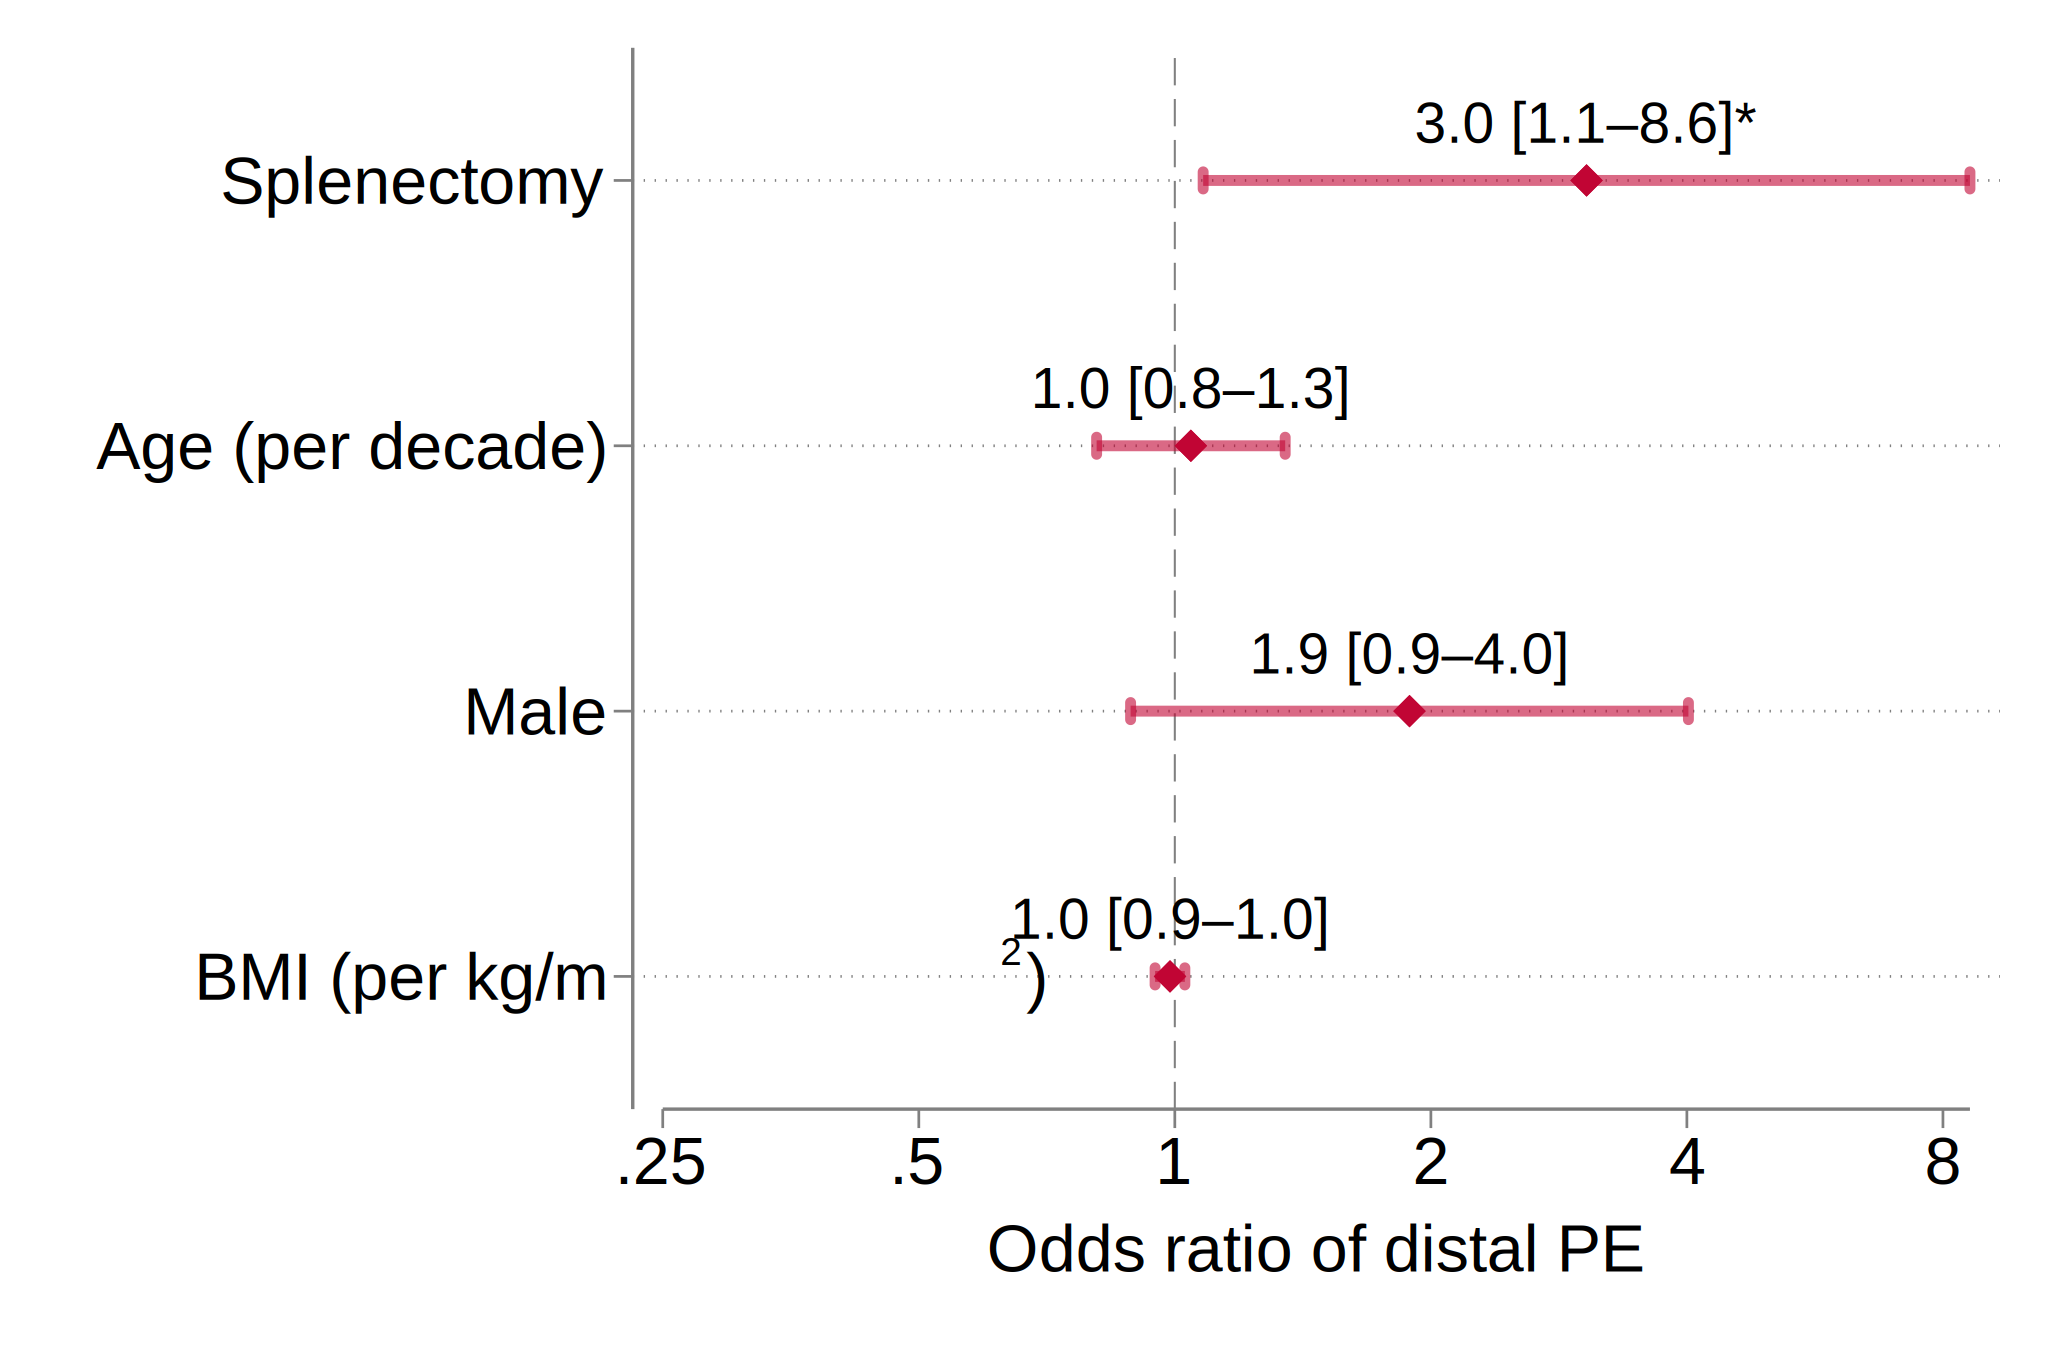

In [20]:
%%stata
graph set window  fontface "Calibri"

coefplot peripheral, eform ///
drop(_cons) ///
xline(1, lp(dash) lc(gs8) lw(vthin)) ///
xlabel(0.25 0.5 1 2 4 8, labsize(large) nogrid) ///
xscale(log range(0.25 4 8) extend) ///
xtitle("Odds ratio of distal PE" , size(large)) yscale(extend) ///
ylabel(, labsize(large) nogrid) ///
msymbol(D) msize(medium)  mcolor(cranberry) ///
ciopts(recast(rcap) ///
lwidth(thick) lcolor(cranberry%60)) ///
mlabel(string(@b,"%4.1f") + " [" + string(@ll,"%4.1f") + "–" + ///
string(@ul,"%4.1f") + "]" + ///
cond(@pval<.001,"***",cond(@pval<.01,"**",cond(@pval<.05,"*","")))) ///
mlabsize(medlarge) mlabposition(12) mlabgap(2) ///
scheme(white_tableau) 


more likely to be peripehral if splenectomy, after accounting for other factors.

Lastly - the PA size metrics. 

They have relatively normal distributions - so just modeled with plain old linear regression

In [ ]:
%%stata
regress pa_d splenectomy age male_sex bmi_pe
estimates store regress_pa_d

In [ ]:
%%stata
coefplot regress_pa_d, ///
drop(_cons) ///
xline(0) ///
xlabel(-2(1)2, labsize(large)) ///
xscale(range(-2.5 2.5) extend) ///
xtitle("Change in PA diameter (mm)" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,"%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 

In [ ]:
%%stata
regress pa_aa splenectomy age male_sex bmi_pe
estimates store regress_pa_aa

In [ ]:
%%stata
coefplot regress_pa_aa, ///
drop(_cons) ///
xline(0) ///
xlabel(-.1(0.05).1, labsize(large)) ///
xscale(range(-.12 .12) extend) ///
xtitle("Change in PA:AA ratio (mm)" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.3f") + " [ " + string(@ll,"%9.3f") + " - " + string(@ul,"%9.3f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 

## Appendix

### This is code to assess inter-rater agreement

(Can move this to the end; probably just summarize the agreement and then could include visualizations in supplement if anyone asks - they probably wont)

First, inter-rater agreement of central-vs peripheral is assessed: I would report the Kappa for this. 
Then, for the Qanadli score - limits of agreement are rported: I would report the mean difference (95% UL and LL agreement)

These are pretty good. 

In [ ]:
%%stata
kap central_darren central_mark
kappaetc central_darren central_mark, tab benchmark(d) showscale

In [ ]:
%%stata
pvenn2 central_darren central_mark, plabel("Central_DW" "Central_MD") title("Agreement in Central Determination")
graph export "Results and Figures/$S_DATE/Overlap in Central Assessments.png", as(png) name("Graph") replace 

In [ ]:
%%stata
kappaetc qanadli_mark qanadli_darren, loa returnonly
// di "Number of subjects: " r(N)
di "Mean difference of ratings: " r(mean_diff)
// di "Standard deviation of mean difference: " r(sd_diff)
di "Lower limit of agreement: " r(loa_ll)
di "Upper limit of agreement: " r(loa_ul)
di "Level for limits of agreement: " r(loa_level)
kappaetc qanadli_mark qanadli_darren, loa 
graph export "Results and Figures/$S_DATE/Bland Altman Qanadli.png", as(png) name("Graph") replace 